
# Homework 5: Bootstrapping, Hypothesis Testing, and Regression
***

**Name**: 

***

This assignment is due on Moodle by **11:59 PM on Friday 17 April**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 


In [134]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

---

### [20 points] Problem 1 - Hypothesis Testing: Knowledge Check

You are working as a Data Scientist for an internet company. Your co-worker, Bob Dob, is a lovable scamp! Unfortunately, he also makes a lot of mistakes throughout the day as the two of you team up to tackle some inference work regarding your company's customers. In each case, clearly explain why Bob's hypothesis testing setup or conclusion is incorrect.

**Part A**: Bob has some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the proportion of last month's website visitors that bought something.  

Let $X$ be the random variable describing the number of website visitors who bought something in the previous month, and suppose that the population proportion of visitors who bought something is $p$. Bob is particularly interested to see if the data suggests that more than 20% of website visitors actually buy something.  He decides to perform the test with a null hypothesis of $H_0: \hat{p} = 0.20$, where $\hat{p}$ is the sample proportion.

Bob should not be using $\hat{p}$ because it implies a statistic. He is trying to find the population value.

**Part B**: Bob decides instead to do his hypothesis test with a null hypothesis of $H_0: p > 0.2$.

Bob should make the **alternative** hypothesis to be $p > 0.2$

**Part C**: Finally on track with reasonable hypotheses of $H_0: p = 0.20$ and $H_1: p > 0.20$, Bob computes a normalized test-statistic of $z = -1.5$ for the sample proportion and concludes that since $-1.5 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ (95%) significance level that the proportion of customers who buy something is less than 15%.

Almost, but Bob should not compare the z value to $\alpha$. He should find a p-value to cpmare to $\alpha$.

**Part D**: Bob is again conducting the hypothesis test of $H_0: p = 0.20$ and $H_1: p > 0.20$. He computes a p-value of $0.06$, and thus concludes that there is only a 6% probability that the null hypothesis is true. 

This is incorrect. Bob should be comparing a p-value = .06 to $\alpha$. The value is less than $\alpha$, hence we can reject the Null hypothesis.

---


### [30 points] Problem 2 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 95% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Do all computations in Python by hand, and report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

1. We cannot, as all the confidence intervals overlap with eachother.

2. we used a t-distribution because we had normal data, unknown $\sigma$ and our sample size was less than 30

In [10]:
#Sample Size
n = 10
# COFFEE + NAP
sampleMean = 451.3
s = 31.9
CI_CN = [sampleMean + flip * stats.t.ppf(0.96, n-1) * s/np.sqrt(n) for flip in [-1,1]] 
# COFFEE
sampleMean2 = 494.2
s2 = 39.6
CI_C = [sampleMean2 + flip * stats.t.ppf(0.96, n-1) * s/np.sqrt(n) for flip in [-1,1]]
# NAP
sampleMean3 = 492.8
s3 = 45.2
CI_N = [sampleMean3 + flip * stats.t.ppf(0.96, n-1) * s/np.sqrt(n) for flip in [-1,1]]

print("Coffee & Nap 95%: CI = ", CI_CN)
print("Coffee 95%: CI = ", CI_C)
print("Nap 95%: CI = ", CI_C)

Coffee & Nap 95%: CI =  [431.4005394328484, 471.1994605671516]
Coffee 95%: CI =  [474.3005394328484, 514.0994605671516]
Nap 95%: CI =  [474.3005394328484, 514.0994605671516]


**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

$\mu_1$ defined as nap

$\mu_2$ defined as drinking coffee

$H_0: \mu_1 - \mu_2 \geq 0$

$H_1: \mu_1 - \mu_2 < 0$

In [12]:
xbar, sx, nx = 494.2, 39.6, 10 # coffee
ybar, sy, ny = 492.8, 45.2, 10 # nap 

diff = xbar - ybar # difference of means
denom = np.sqrt((sx**2)/nx + (sy**2)/ny)
T = diff / denom

pval = 1 - stats.t.cdf(T, nx + ny - 2) # n minus 2 for this calculation
print("Test Stat = {:.3f}".format(T))
print("p - value = {:.3f}".format(pval))

Test Stat = 0.074
p - value = 0.471



We do a test of the difference between means to come to a conlusion using test statistic as follows Where N = Nap and C = Coffee

$T = (\bar{x}_{Nap} - \bar{x}_{Coffee})\bigg/\sqrt{\frac{s_N^2}{n_N} + \frac{s_C^2}{n_C}} $

Since our p - value is definitely LARGER than alpha of .025 we can accept the Null

where there is INSUFFICIENT evidence to conclude that naps promote faster reaction times than coffee


**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

In [14]:
# coffee-nap versus coffee
xbar, sx, nx = 494.2, 39.6, 10 # coffee
ybar, sy, ny = 451.3, 31.9, 10 # coffee-nap

diff = xbar - ybar # difference of means
denom = np.sqrt((sx**2)/nx + (sy**2)/ny)
T = diff / denom

pval = 1 - stats.t.cdf(T, nx + ny - 2) # n minus 2 for this calculation
print("Test Stat = {:.3f}".format(T))
print("p - value = {:.3f}".format(pval))

Test Stat = 2.668
p - value = 0.008


$T = (\bar{x}_{Coffee} - \bar{x}_{CoffeeNap})\bigg/\sqrt{\frac{s_N^2}{n_N} + \frac{s_C^2}{n_C}}$

Since our p - value is definitely SMALLER than alpha of .025 we can reject the Null
where there is SUFFICIENT evidence to conclude that coffee naps promote faster reaction times than coffee


In [17]:
# coffee-nap versus nap
xbar, sx, nx = 492.8, 45.2, 10 # nap
ybar, sy, ny = 451.3, 31.9, 10 # coffee-nap

diff = xbar - ybar # difference of means
denom = np.sqrt((sx**2)/nx + (sy**2)/ny)
T = diff / denom

pval = 1 - stats.t.cdf(T, nx + ny - 2) # n minus 2 for this calculation
print("Test Stat = {:.3f}".format(T))
print("p - value = {:.3f}".format(pval))

Test Stat = 2.372
p - value = 0.015


$T = (\bar{x}_{Nap} - \bar{x}_{Coffee})\bigg/\sqrt{\frac{s_N^2}{n_N} + \frac{s_C^2}{n_C}}$

Since our p - value is definitely LARGER than alpha of .025 we can accept the Null
where there is INSUFFICIENT evidence to conclude that naps promote faster reaction times than coffee naps

**Part D**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

Confidence interval for std dev is as follows:

$\sqrt{\dfrac{(n-1)s^2}{\chi^2_{\alpha/2, n-1}}} \leq \sigma \leq 
\sqrt{\dfrac{(n-1)s^2}{\chi^2_{1-\alpha/2, n-1}}}$

In [18]:
# COFFEE + NAP STANDARD DEVIATION
alpha = 0.025 
denom2, denom1 = stats.chi2.ppf(alpha/2, n - 1), stats.chi2.ppf(1 - alpha/2, n - 1)

# Using our chi^2 values
CI = [np.sqrt((n - 1)*sy*sy/denom1), np.sqrt((n - 1)*sy*sy/denom2)]
print("CI = ", CI)

CI =  [20.86653200759956, 64.23553338238837]


<br>

---

### [50 points] Problem 3 - Simple Linear Regression for Science!

[Google Trends](https://trends.google.com/trends/?geo=US) is a free source of data about the interest in particular search terms. In this problem, we'll look at the interest in the search term "Influenza" and discover how interest in "Influenza" is changing over time. Interest is measured relative to the maximum rate of Google searches for that term over the time period (so the maximum is 100). 

**Part A:** Load up the data in `influenza_interest.csv` into a Pandas DataFrame. Create two new columns:

* `Year` should be the year associated with that data point, and
* `Month` should be the month (1-12) associated with that data point.

Then, make a **scatter plot** (using `pyplot.scatter`) of all of the data points, showing how interest in "influenza" has evolved over time. Label the x-axis by year, displaying ticks for Janurary of each year between 2004 and 2021 (so that we can see all of the data and don't cut the year 2020 off at January 2020). You may find the Matplotlib DateFormatter object and the matplotlib dates module useful to correctly plot this data. You may use them if you wish to, but don't need to. They're imported below.

In [8]:
#STARTER CODE DO NOT CHANGE
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

Text(0.5, 1.0, 'Effect of Time on Interst in Influenza')

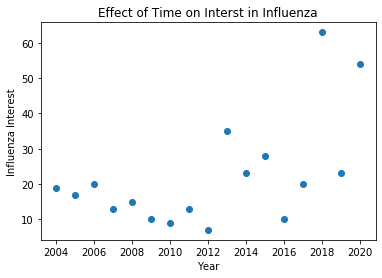

In [178]:
df = pd.read_csv("influenza_interest.csv")
raw_date = df['Month'].tolist()
year = []
month = []
for i in range(0, len(raw_date)):
    raw = raw_date[i]
    year.append(raw[:4])
    month.append(raw[5:])
del df['Month']
df['Month'] = month
df['Year'] = year
df["Year"] = pd.to_numeric(df['Year'])


df_jan = df.loc[df['Month'] == "01"]
plt.scatter(df_jan['Year'], df_jan['Interest'])
plt.ylabel('Influenza Interest')
plt.xlabel('Year')
plt.title('Effect of Time on Interst in Influenza')

**Part B:** This data (and the sea-level data from Homework 4) are both **time series**, where the independent variable is *time* and the dependent quantity is interest in influenza (or sea level in the case of HW 4). One of the central assumptions of linear regression is that the data are observations generated by some process, independently of one another. With time series data, we need to be careful because there could be some other process affecting the output data. In particular, **annual cycles** are patterns that reoccur each year and are frequently present in time series data. For example, seasonal patterns of weather are annual cycles.

To see what kind of effect time has, make a **line plot** (using `pyplot.plot`) of the interest in influenza, as a function of time. Again, include all of the data points and, for the x-axis, label only the tick marks associated with January of each year, and be sure to label your axes.

Text(0.5, 1.0, 'Effect of Time on Interst in Influenza')

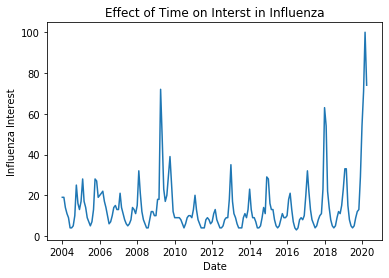

In [75]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df_date = pd.read_csv("influenza_interest.csv")
df_date['Month'] = pd.to_datetime(df_date['Month'])

plt.plot(df_date['Month'], df_date['Interest'])
plt.ylabel('Influenza Interest')
plt.xlabel('Date')
plt.title('Effect of Time on Interst in Influenza')

**Part C:** Does your plot from Part B suggest that there is some annual cycle to the interest in influenza? During which months is interest in influenza highest? What about lowest? Justify your answers using your plot, **and** by computing the mean interest in influenza for each month. So, compute 12 values and report them in a markdown table. Do **not** just spit out a horizontal list of 12 numbers. That would be yucky to try to read, and we're scientists.

What do you think accounts for the increased interest in influenza during the fall and winter months?

In [88]:
month_mean = []
df["Month"] = pd.to_numeric(df['Month'])
for i in range(1,13):
    df_temp = df.loc[df['Month'] == i]
    month_mean.append(df_temp['Interest'].mean())
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print("Average Influenze Interest by month (2004-2020): \n")
for i in range(0,12):
    print(months[i], " = ", month_mean[i])

Average Influenze Interest by month (2004-2020): 

January  =  22.294117647058822
February  =  25.470588235294116
March  =  21.88235294117647
April  =  18.941176470588236
May  =  10.5625
June  =  6.4375
July  =  5.0
August  =  6.0625
September  =  10.25
October  =  14.9375
November  =  12.9375
December  =  14.9375


Influenza is a seasonal disease, people normally get sick from the flu in the fall and winter. 

By referencing the plot as well as the mean interests in each month we can see clear fluctuations with an increase in Interest during the winter months (peaking at around 25.5 in February) and falling dramatically in the warmer season (July with an interest mean of only 5.0).

**Part D:** (Spoiler alert!) Since there seems to be an annual cycle, one of the fundamental assumptions of our simple linear regression model is not satisfied. Namely, it is not the case that the model-data residuals, $\epsilon_i$, are independent of one another.

So, we need to process our data a bit further before fitting a regression model. One way to address this is to take the mean of all the data each year and use for analysis the time series of annual mean interest in data science. Write a function (you'll want to use this code again later) that takes in the monthyl DataFrame, and returns a new DataFrame that consists only of two columns:

* `year`, and
* `interest`, the mean interest in data science from all of the months in that year.

Then call this function to convert the monthly data into yearly averages. Print the entire resulting datframe. 

**NOTE:** We have one year with incomplete data in our dataframe. Since 2020 isn't complete yet, we only have 3 months of data for this year. Here, we should compute the average of the three months we have. We'd recommend using a pandas [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) on the year column to compute averages, but how you do this is up to you. If you do use a group by, you may find the .reset_index dataframe function useful to clean up the output. Don't hardcode the years, or do anything that relies on a year being twelve months. It will make your life harder later in this problem.

In [111]:
def influenza_helper(df):
    yearly_mean = []
    year = []
    df["Year"] = pd.to_numeric(df['Year'])
    for i in range(0, 17):
        df_temp = df.loc[df['Year'] == i + 2004]
        yearly_mean.append(df_temp['Interest'].mean())
        year.append(2004+i)
    df_mean['Interest'] = yearly_mean
    df_mean['Year'] = year
    return df_mean


**Part E:** Write a function to fit a a simple linear regression model with `year` as the feature and `interest` as the response (mean annual interest in influenza). You'll need to use this function later. This function should take in a dataframe and return a fitted model. Use the "statsmodels" package (imported below as "sm") to generate the model using their convenient [Ordinary Least Squares model](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html). Here, you'll want to add a constant term to the feature, so that the statsmodel package can fit the regression model with a non-zero Y intercept. There's a helpful function in the statsmodels package to add a constant term, or you can write code to add the constant yourself, if you wish.

Call the function you wrote to get the regression model of our yearly average interest, then print the parameters of the regression line in the form $Y = \alpha + \beta x$. 

Then make a scatter plot of the mean annual interest in influenza as a function of year, and overlay the estimated regression line. Label your axes and provide a legend.

In [135]:
#STARTER CODE DO NOT CHANGE
import statsmodels.api as sm

Y = 1.1901552287582078 * X + -2377.91584967328


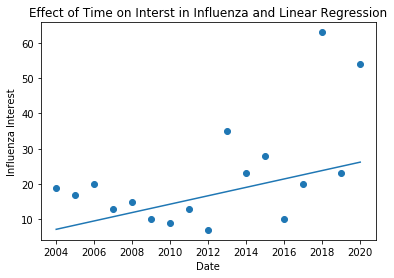

In [179]:

def linreg(df, df_jan, max_num):
    df_lin = influenza_helper(df)

    # spector_data = sm.datasets.spector.load(as_pandas=False)

    # spector_data.exog = sm.add_constant(df_lin['Interest'], prepend=False)
    # Fit and summarize OLS model
    mod = sm.OLS(df_lin['Interest'], sm.add_constant(df_lin['Year']))
    res = mod.fit()
    print("Y =", res.params[1], "* X +", res.params[0])
    plt.scatter(df_jan['Year'], df_jan['Interest'])
    x = np.linspace(2004,2020,10)
    y = res.params[1]*x+res.params[0]
    plt.plot(x,y)
    plt.ylabel('Influenza Interest')
    plt.xlabel('Date')
    plt.title('Effect of Time on Interst in Influenza and Linear Regression')

linreg(df, df_jan, 2020)

**Part F**: Give a physical interpretation of the coefficient $\hat{\beta}$, estimated from your model. Include addressing whether the relationship between time and interest in influenza is positive or negative. Fully justify your responses.

The relationship between time and interest is shown to be positive my the model. I dont see this clear trend, rather the data could be skewed by the 2020 covid padnemic outlier.

**Part G**: What interest in influenza does your simple linear regression model predict in the year 2050? What about in 2150? How about 1900? Feel free to use the statsmodels .predict() method here. What are potential drawbacks to this model for interest in influenza (think about the minimium and maximum values for the data)? 

**Note**: From Google Trends Documentation, the "interest" variable is defined as: "Interest represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term."

In [177]:
res.predict(df_jan['Interest'])

ValueError: shapes (1,17) and (2,) not aligned: 17 (dim 1) != 2 (dim 0)

**Part H:** Write a function that computes an 90% confidence interval for the slope parameter, $\beta$. You'll need to use this function again later. This function should take in the dataframe of yearly data and a statsmodel linear regression model, and print both the 90% confidence interval for beta and the value of $\hat{\beta}$. You should be performing all calculations yourself in Python. 

**RULES: There is a statsmodels function that computes the confidence interval. Do not use it, write python code yourself to calculate the CI. You may use the statsmodels confidence interval function to check your work if your like. You also may use the statsmodel .predict() method to get predicted values, and the .params attribute to get the slope parameter. Write your own code to calculate the sum of square errors. You may use numpy functions (min, max, mean, var, etc...) and stats functions (ppf/cdf/etc...) where appropriate.**

Call the function to calculate the 90% CI for beta with this model.

**Part I:** What proportion of the variation in mean annual interest in influenza is explained by your linear regression model? Note: It's fine to use the model .summary method here. You do not need to calculate this by hand.

**Part J:** Ouch, so that model doesn't really explain very much of the variance in the data! Maybe we have some outliers in our data. Use your original monthly dataframe and drop any rows that have an interest value greater than or equal to the 97th percentile of our data. Print the number of rows remaining.

**Part K:** In this problem, you'll use the functions you wrote in parts **D**, **E**, and **H** to process your new outlier free data, then fit a regression model and calculate the confidence interval on the slope parameter of the new model. First, use your function from part **D** to get the yearly averages. Second, use the function from part **E** to fit a linear regression model to the yearly averages. Finally, use the function you wrote in **H** to print the 90% confidence interval of the slope and the estimated slope.

**Part L:** Our estimate for beta, the slope parameter in part **K** should have come out to be slightly negative, and also should have had a confidence interval that included zero (check your work if it didn't). What does this tell us about our data? Does it seem like interest in Influenza is increasing or decreasing over time? Or is the interest in Influenza more affected by yearly trends and high peaks in intrest during especially bad years for flu (or flu like diseases)?